In [35]:
import pandas as pd
import numpy as np

In [36]:
df = pd.read_csv('tips.csv')
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


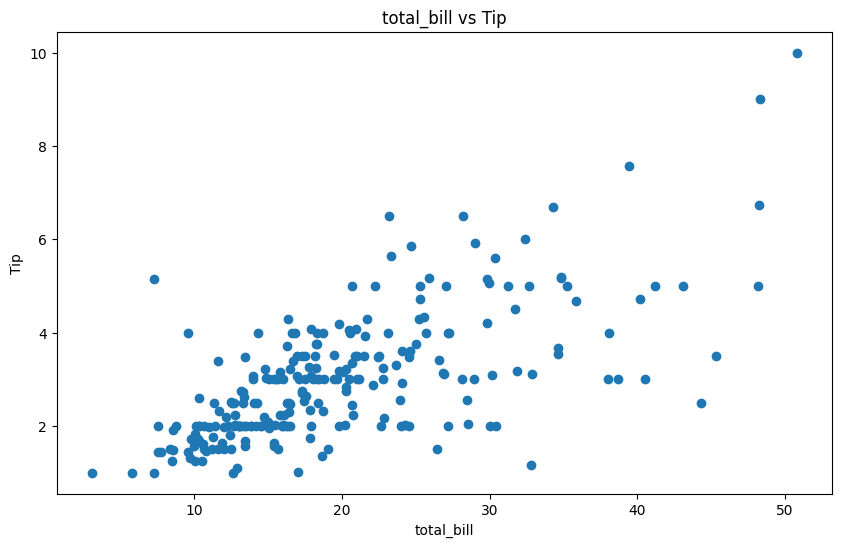

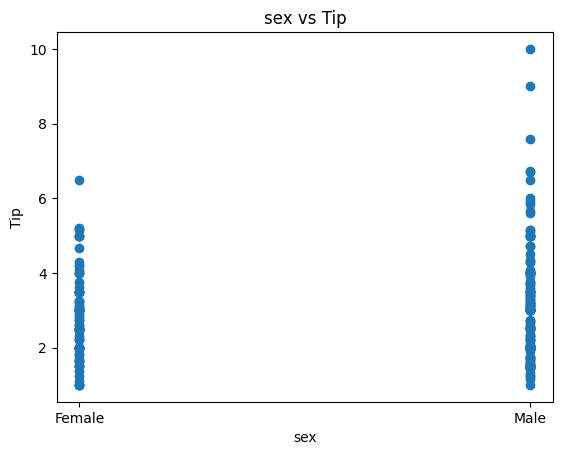

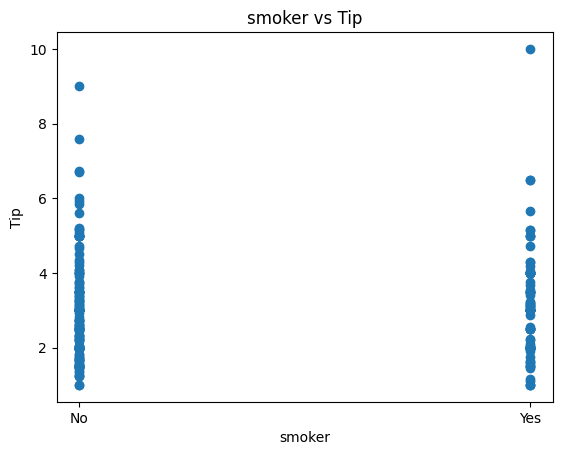

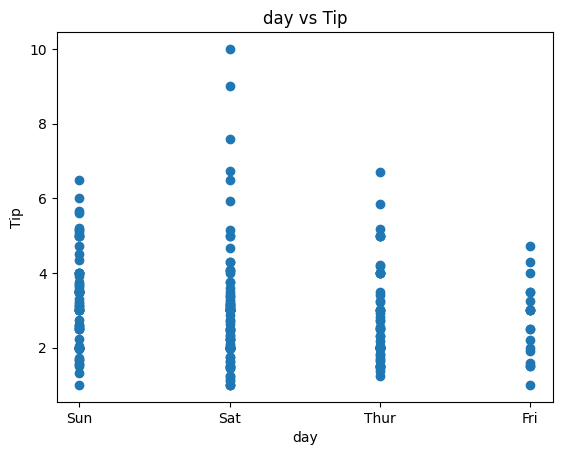

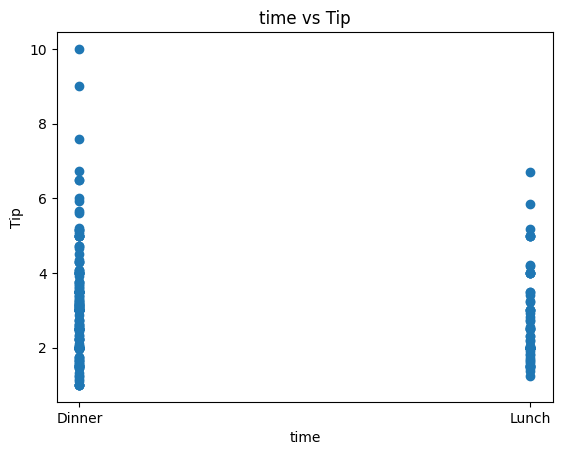

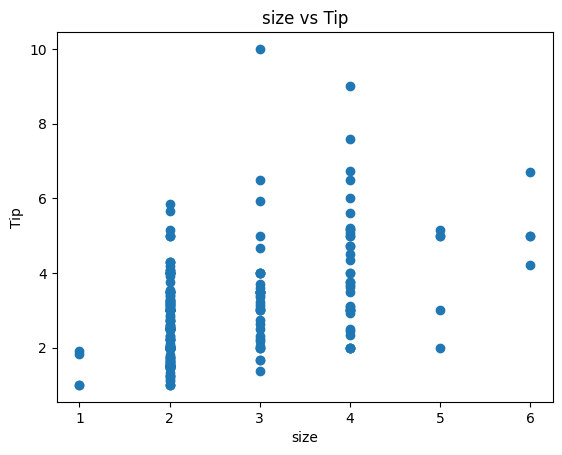

In [37]:

import matplotlib.pyplot as plt
df_data = df.drop(columns=['tip'])
df_target = df['tip']

plt.figure(figsize=(10, 6))

for i in range(0,6):
    plt.scatter(df_data.iloc[:,i], df_target)
    plt.xlabel(df_data.columns[i])
    plt.ylabel('Tip')
    plt.title(df_data.columns[i] + ' vs Tip')
    plt.show()

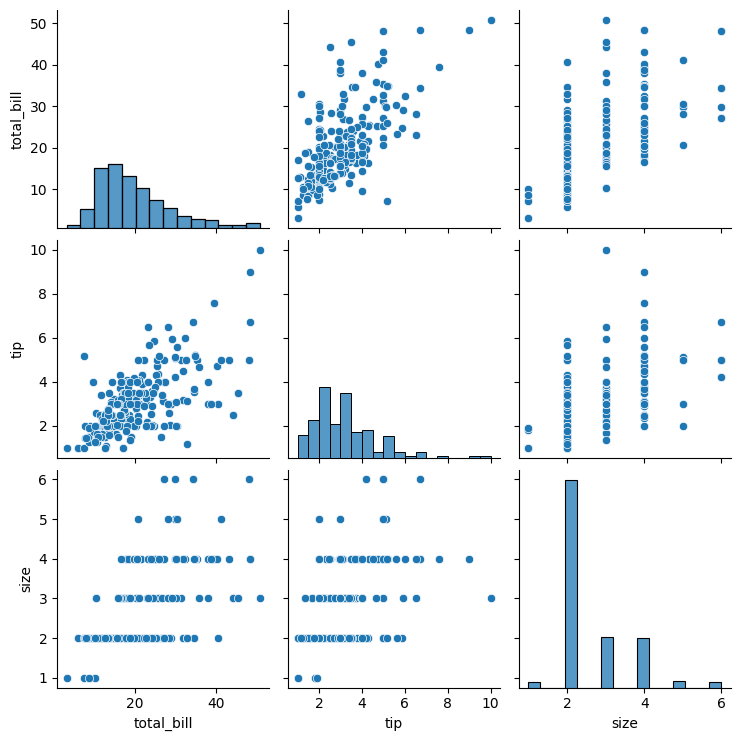

In [38]:
import seaborn as sns
sns.pairplot(df)

<Axes: >

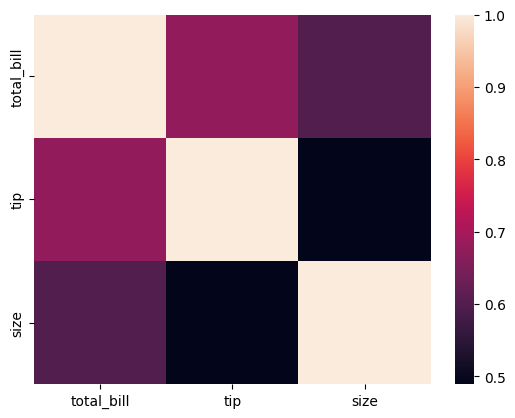

In [39]:
# Convert variable datatypes to get correlation matrix
df_corr = df[['total_bill', 'tip', 'size']].copy()
corr = df_corr.corr()
sns.heatmap(corr)

In [40]:

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df_data['sex'] = label_encoder.fit_transform(df['sex'])
df_data['smoker'] = label_encoder.fit_transform(df['smoker'])
df_data['day'] = label_encoder.fit_transform(df['day'])
df_data['time'] = label_encoder.fit_transform(df['time'])

In [41]:
import statsmodels.api as sm
# Define independent (X) and dependent (y) variables
X = df_data
X = sm.add_constant(X)
y = df_target

# Fit the linear regression model
model = sm.OLS(y, X).fit()

In [42]:
from statsmodels.stats.diagnostic import linear_rainbow

test_stat, p_value = linear_rainbow(model)

print(f"Rainbow Test Statistic: {test_stat}")
print(f"P-value: {p_value}")

Rainbow Test Statistic: 1.2036274510126597
P-value: 0.15798464222013167


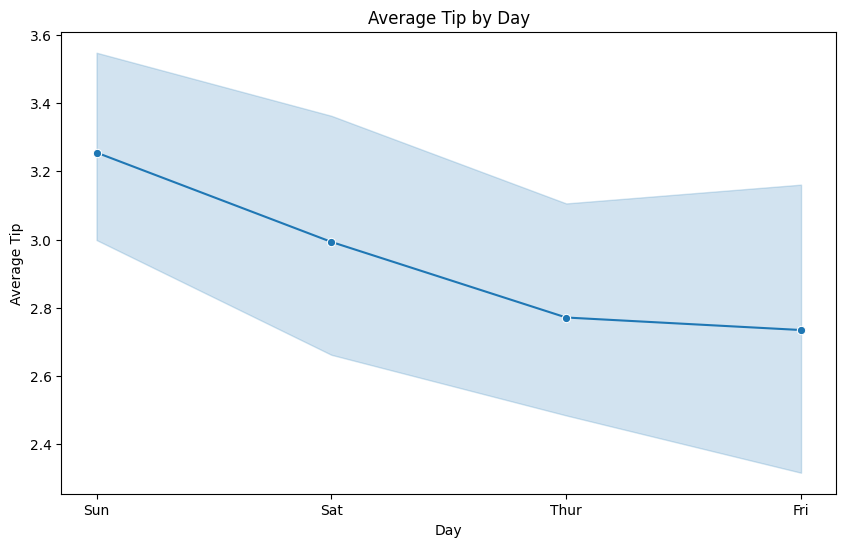

In [43]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x="day", y="tip", estimator="mean", marker="o")
plt.title("Average Tip by Day")
plt.xlabel("Day")
plt.ylabel("Average Tip")
plt.show()

In [44]:
from sklearn.model_selection import train_test_split, cross_val_score

tips_encoded = pd.get_dummies(df, columns=['sex', 'smoker', 'day', 'time'], drop_first=True)

X = tips_encoded.drop(columns='tip')
y = tips_encoded['tip']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [45]:

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lr = lin_reg.predict(X_test)

mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
print("Linear Regression -\nMSE:", mse_lr, "\nR^2:", r2_lr, "\nRMSE:", np.sqrt(mse_lr))

Linear Regression -
MSE: 0.7033566017436106 
R^2: 0.43730181943482493 
RMSE: 0.8386635807900631


In [46]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

from sklearn.model_selection import GridSearchCV
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)

# Evaluate model
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)
print("Ridge Regression -\nMSE:", mse_ridge, "\nR^2:", r2_ridge, "\nRMSE:", np.sqrt(mse_ridge))


Ridge Regression -
MSE: 0.7007477213216077 
R^2: 0.4393889716178484 
RMSE: 0.8371067562274287


In [47]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)

# Evaluate model
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)
print("Lasso Regression -\nMSE:", mse_lasso, "\nR^2:", r2_lasso, "\nRMSE:", np.sqrt(mse_lasso))

Lasso Regression -
MSE: 0.5908528649971524 
R^2: 0.5273068720881755 
RMSE: 0.768669542129225


In [48]:
tree = DecisionTreeRegressor(random_state=42)
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)

# Evaluate model
mse_tree = mean_squared_error(y_test, y_pred_tree)
r2_tree = r2_score(y_test, y_pred_tree)
print("Decision Tree -\nMSE:", mse_tree, "\nR^2:", r2_tree, "\nRMSE:", np.sqrt(mse_tree))

Decision Tree -
MSE: 1.2551938775510205 
R^2: -0.004178121600921791 
RMSE: 1.120354353564541


In [49]:
forest = RandomForestRegressor(random_state=42, n_estimators=100)
forest.fit(X_train, y_train)
y_pred_forest = forest.predict(X_test)

# Evaluate model
mse_forest = mean_squared_error(y_test, y_pred_forest)
r2_forest = r2_score(y_test, y_pred_forest)
print("Random Forest -\nMSE:", mse_forest, "\nR^2:", r2_forest, "\nRMSE:", np.sqrt(mse_forest))

Random Forest -
MSE: 0.9196720148979602 
R^2: 0.2642455218065466 
RMSE: 0.9589953153680993


In [50]:
svr = SVR(kernel='linear')
svr.fit(X_train, y_train)
y_pred_svr = svr.predict(X_test)

# Evaluate model
mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)
print("Support Vector Regression -\nMSE:", mse_svr, "\nR^2:", r2_svr, "\nRMSE:", np.sqrt(mse_svr))

Support Vector Regression -
MSE: 0.6524534436627769 
R^2: 0.47802527943520123 
RMSE: 0.8077459029068342


In [51]:
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

# Evaluate model
mse_knn = mean_squared_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)
print("K-Nearest Neighbors -\nMSE:", mse_knn, "\nR^2:", r2_knn, "\nRMSE:", np.sqrt(mse_knn))


K-Nearest Neighbors -
MSE: 0.8763725714285714 
R^2: 0.29888587066985495 
RMSE: 0.9361477294896203


In [52]:
# Check coefficients in Lasso model for feature importance
feature_importance = pd.Series(lasso.coef_, index=X.columns)
significant_features = feature_importance[feature_importance != 0].sort_values(ascending=False)
print("Significant Factors impacting tips:")
print(significant_features)

Significant Factors impacting tips:
size          0.108081
total_bill    0.099099
dtype: float64


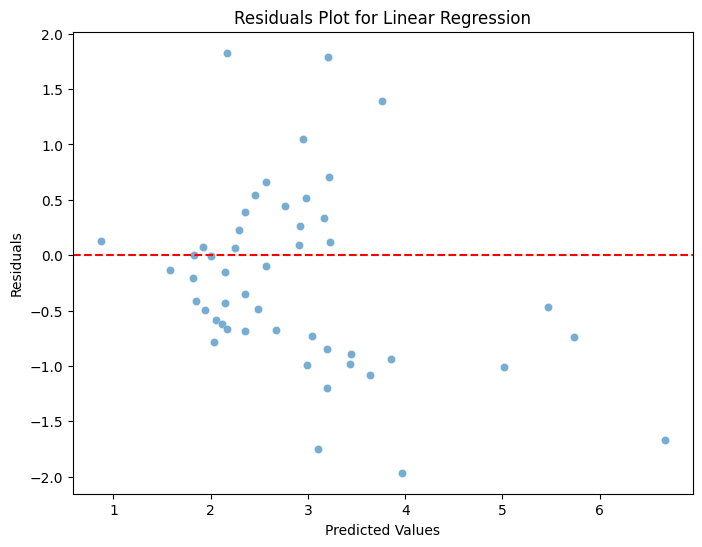

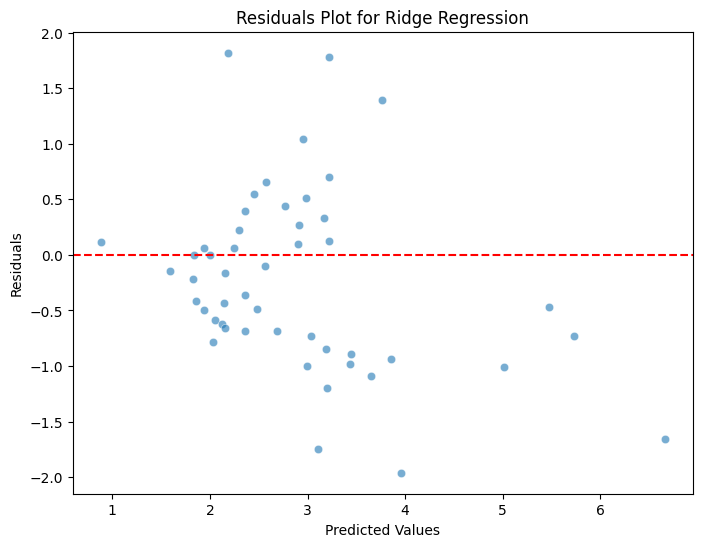

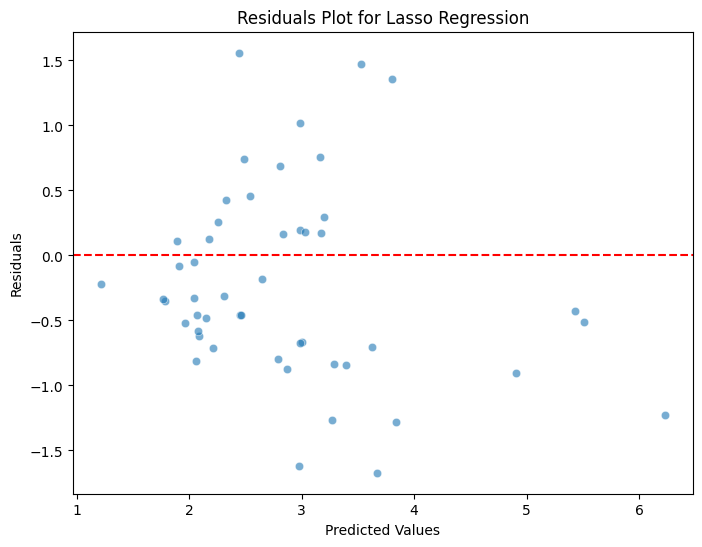

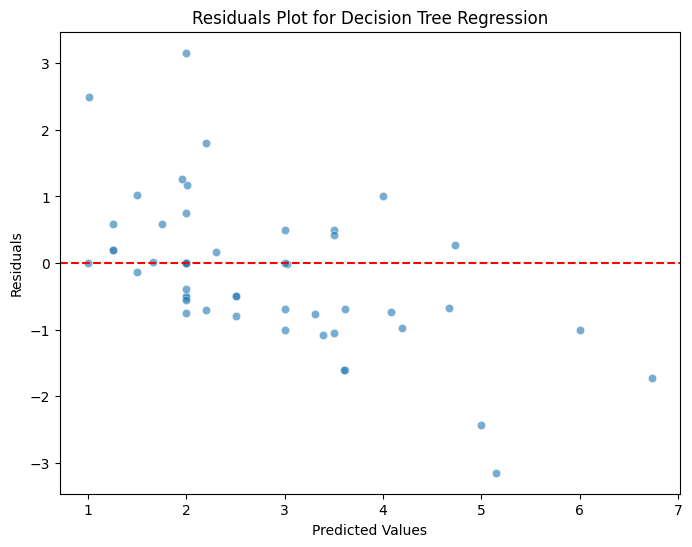

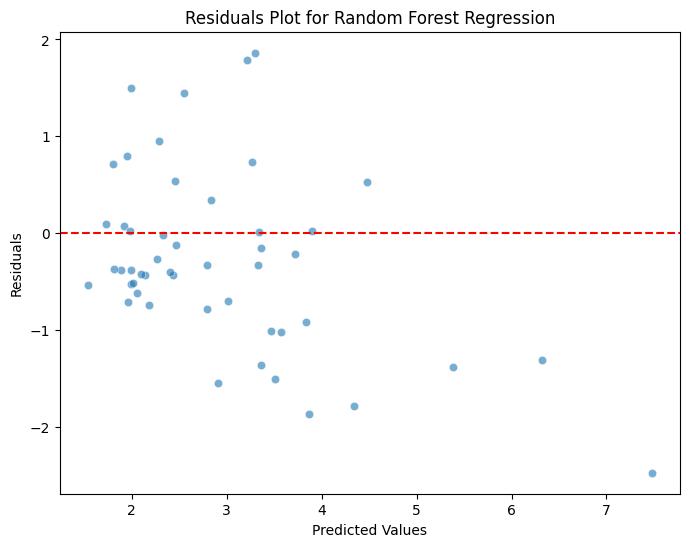

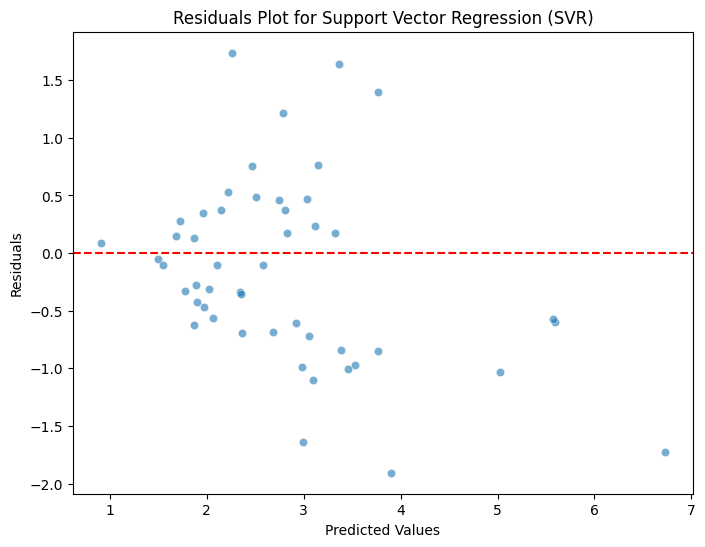

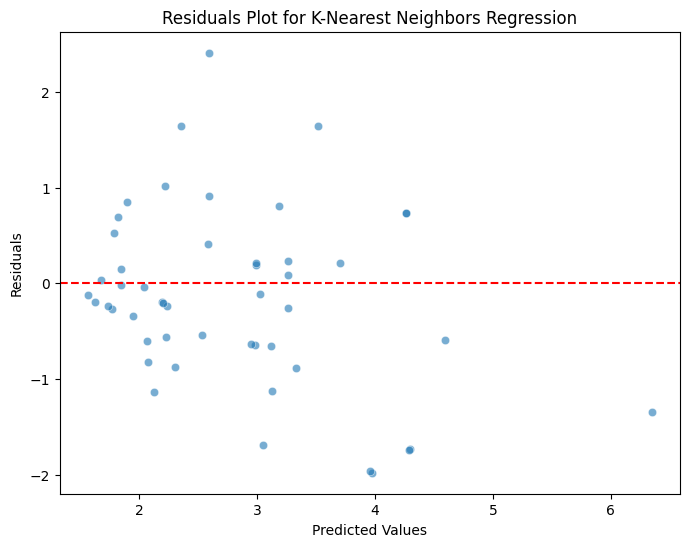

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_residuals(y_true, y_pred, model_name):
    residuals = y_true - y_pred
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=y_pred, y=residuals, alpha=0.6)
    plt.axhline(0, color='red', linestyle='--')
    plt.xlabel("Predicted Values")
    plt.ylabel("Residuals")
    plt.title(f"Residuals Plot for {model_name}")
    plt.show()

models = {
    "Linear Regression": lin_reg,
    "Ridge Regression": ridge,
    "Lasso Regression": lasso,
    "Decision Tree Regression": tree,
    "Random Forest Regression": forest,
    "Support Vector Regression (SVR)": svr,
    "K-Nearest Neighbors Regression": knn,
}

for model_name, model in models.items():
    y_pred = model.predict(X_test)
    plot_residuals(y_test, y_pred, model_name)



# Conclusion
- The business should deliver its top-quality service on Sundays and enhance service quality on Fridays to encourage higher tipping rates.
- Prioritizing dinner hours could also boost tip rates.
- Tables with larger groups should receive special attention, as they typically tip more generously.
- Additionally, focusing on increasing total bill amounts can positively impact tips, given the strong correlation between bill size and tip amount.